# Customer Attrition

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

Predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(last_level=3)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.options.display.max_columns = 99

## 1. Data

In [4]:
telcom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### 1.1. Data overview

In [7]:
print ("Rows     : ", telcom.shape[0])
print ("Columns  : ", telcom.shape[1])
print ('=' * 50, "\nFeatures :\n", telcom.columns.tolist())
print ('=' * 50, "\nMissing values:", telcom.isnull().sum().values.sum())

# Unique values
uni = telcom.nunique()
print ('=' * 50, "\nUnique values:\n", uni)

Rows     :  7043
Columns  :  21
Features :
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Missing values: 0
Unique values:
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [8]:
print('Unique value count for each feature\n')
for col in telcom.columns:
    print('='*50)
    if uni[col] < 10:
        print(telcom[col].value_counts())
    else:
        print('Name: {} - many values to display'.format(col))
        

Unique value count for each feature

Name: customerID - many values to display
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Name: tenure - many values to display
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes               

## 2. Data Manipulation

As we can see, TotalCharges are almost numbers, but there's something that Pandas assigns type 'oject' to this column. We need to check.

In [9]:
telcom[telcom.TotalCharges.apply(lambda x: not x.replace('.','',1).isdigit())]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


These are not null but spaces. As their number is small, we can drop them and convert remained to float type

In [10]:
# Drop rows with TotalCharges is not a number
telcom = telcom[telcom.TotalCharges.apply(lambda x: x.replace('.','',1).isdigit())]
# Convert remained to float type
telcom.TotalCharges = telcom.TotalCharges.astype('float')

Following steps are for Exploratory Data Analysis

In [11]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

In [12]:
#replace values
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [13]:
#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

In [14]:
#Separating churn and non churn customers
churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

In [15]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

In [16]:
print('Categorical columns:\n', cat_cols)
print('='*50)
print('Numerial columns:\n', num_cols)

Categorical columns:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']
Numerial columns:
 ['tenure', 'MonthlyCharges', 'TotalCharges']


## 3. Exploratory Data Analysis
### 3.1. Customer attrition in data

In [17]:
#labels
lab = telcom["Churn"].value_counts().keys().tolist()
#values
val = telcom["Churn"].value_counts().values.tolist()

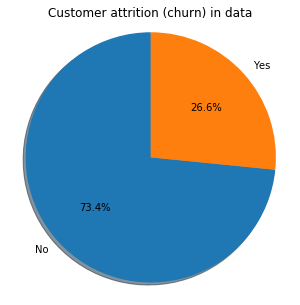

In [18]:
# Pie chart
fig1, ax1 = plt.subplots(1,1,figsize=(5,5))
ax1.pie(x=val, labels=lab, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Customer attrition (churn) in data")
plt.show()

#### Distribution in customer attrition

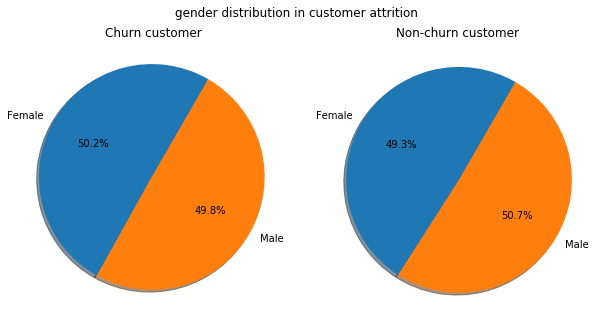

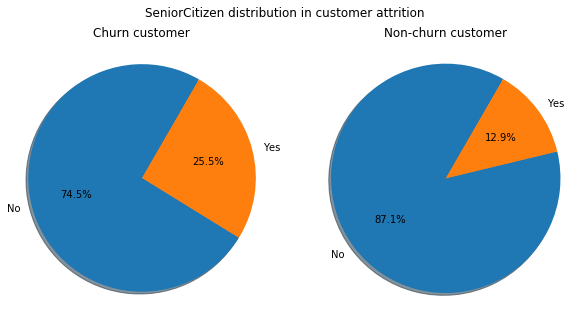

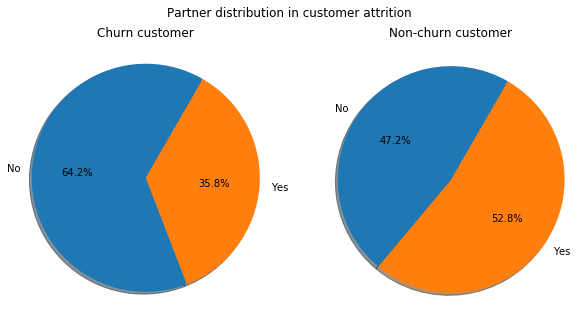

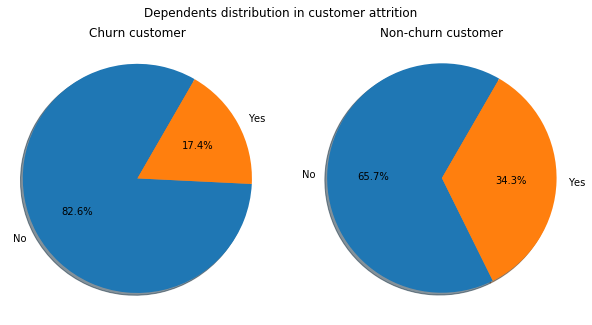

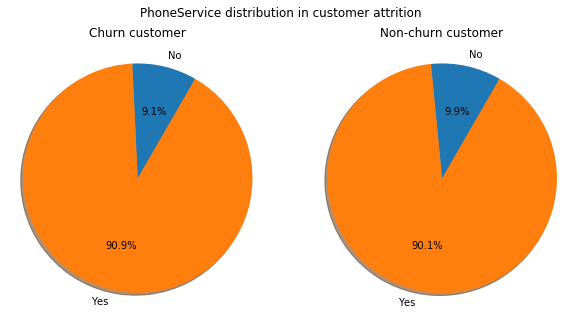

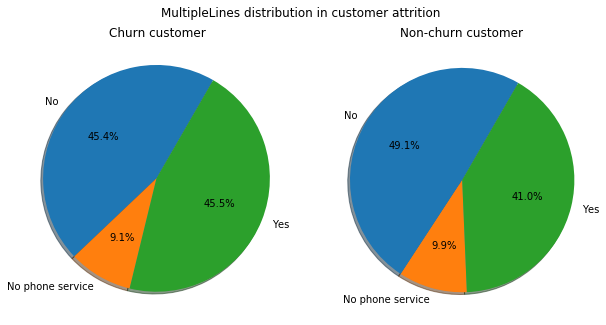

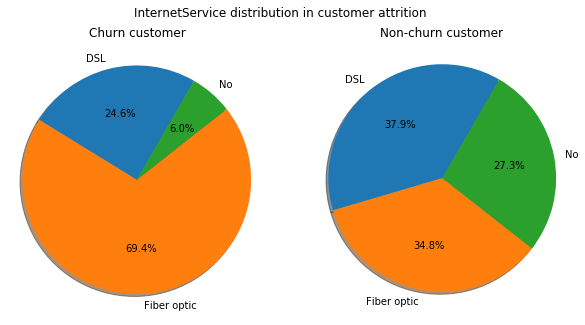

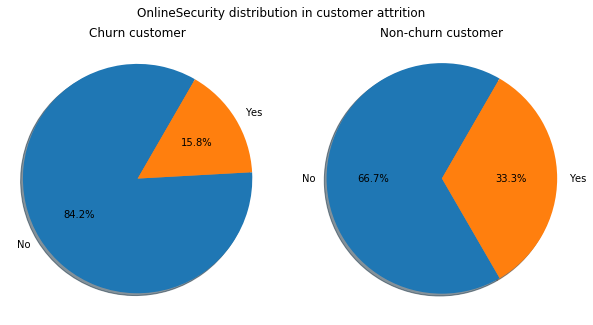

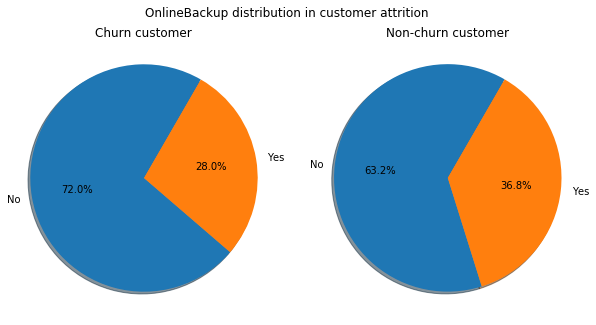

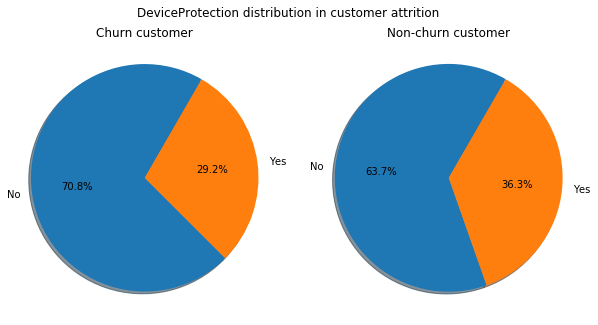

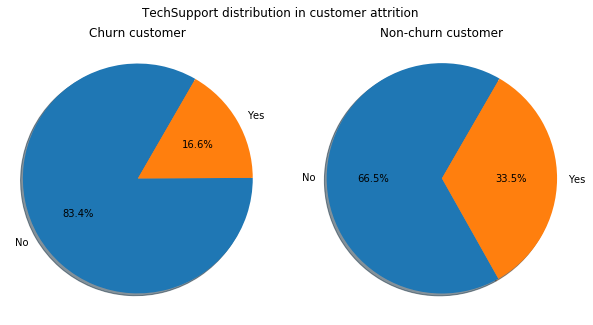

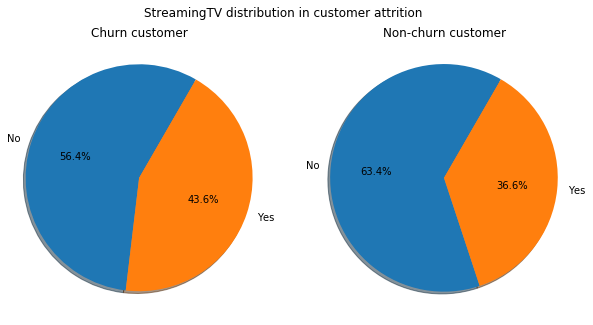

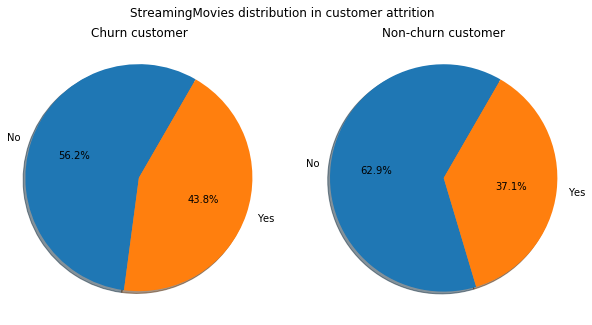

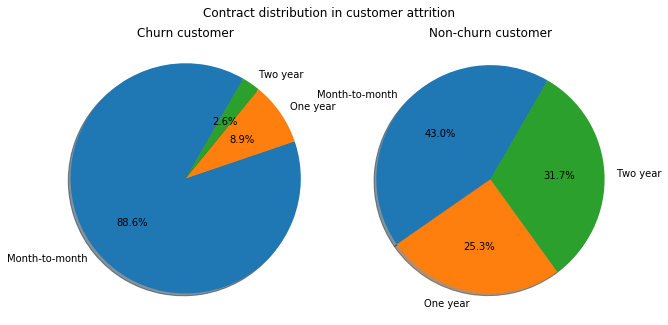

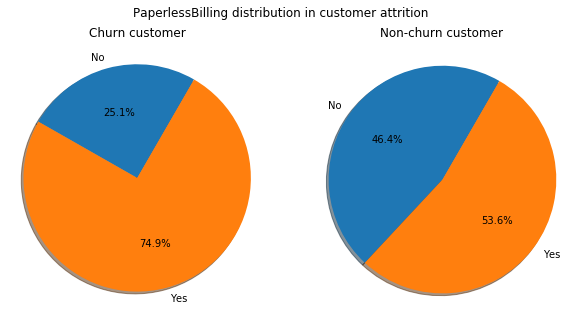

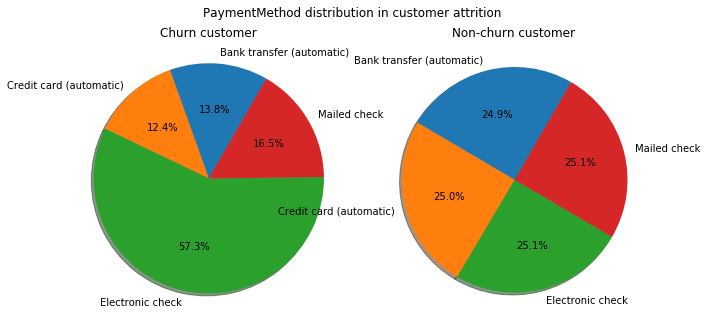

In [19]:
for col in cat_cols:
    if col == 'tenure_group':
        continue
    # get labels in column
    labels = sorted(telcom[col].value_counts().keys().tolist())
            
    # get values
    values_C = []
    values_N = []
    
    # churn customer
    val_C = churn[col].value_counts()
    lab_C = val_C.keys().tolist()
    
    # non-churn customer
    val_N = not_churn[col].value_counts()
    lab_N = val_N.keys().tolist()
    
    # this is to ensure that the same value will be colored the same
    for lab in labels:
        values_C.append(val_C[lab] if lab in lab_C else 0)
        values_N.append(val_N[lab] if lab in lab_C else 0)
        
    # Pie chart
    fig, (ax_c, ax_n) = plt.subplots(1,2,figsize=(10,5))
    ax_c.pie(x=values_C, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60)
    ax_c.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax_c.set_title('Churn customer')

    ax_n.pie(x=values_N, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60)
    ax_n.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax_n.set_title('Non-churn customer')
    plt.suptitle(col +" distribution in customer attrition")
    plt.show()

In [20]:
labels

['Bank transfer (automatic)',
 'Credit card (automatic)',
 'Electronic check',
 'Mailed check']

#### Histogram in tenure_group

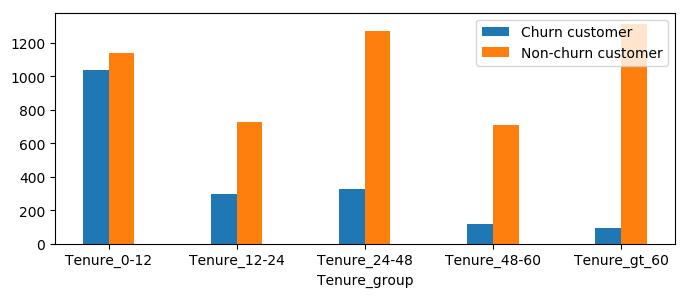

In [21]:
plt.style.use('default')

labels = sorted(telcom.tenure_group.value_counts().keys().tolist())
val_c = []
val_n = []
for lab in labels:
    val_c.append(churn.tenure_group.value_counts()[lab])
    val_n.append(not_churn.tenure_group.value_counts()[lab])
    
plt.figure(figsize=(8,3))
_lab = np.arange(len(labels))

plt.bar(_lab - 0.1, val_c, 0.2, label='Churn customer')
plt.bar(_lab + 0.1, val_n, 0.2, label='Non-churn customer')
plt.xticks(_lab, labels) # set labels manually
plt.xlabel('Tenure_group')
plt.legend()
plt.show()

#### Histogram with numerical colums

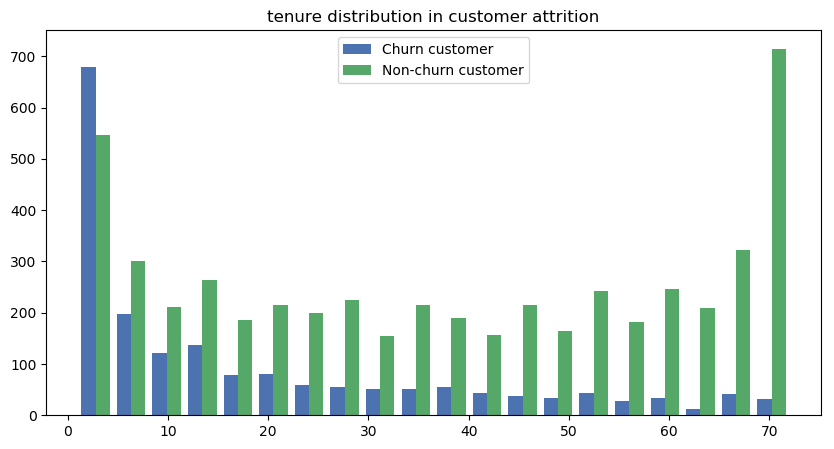

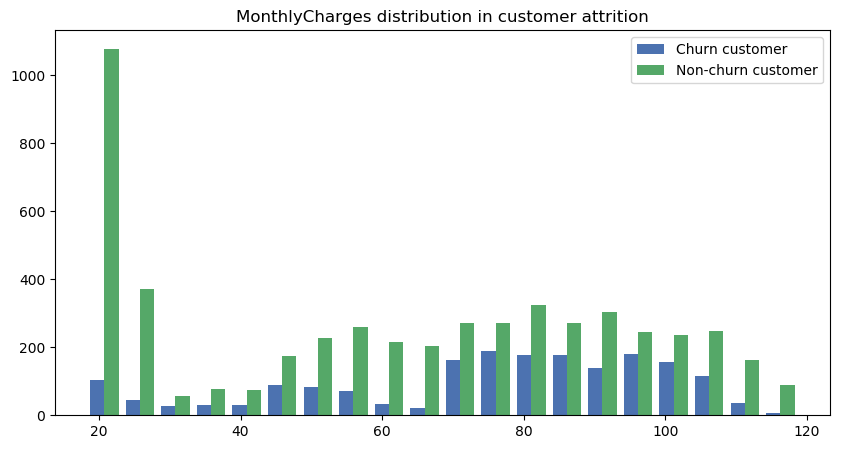

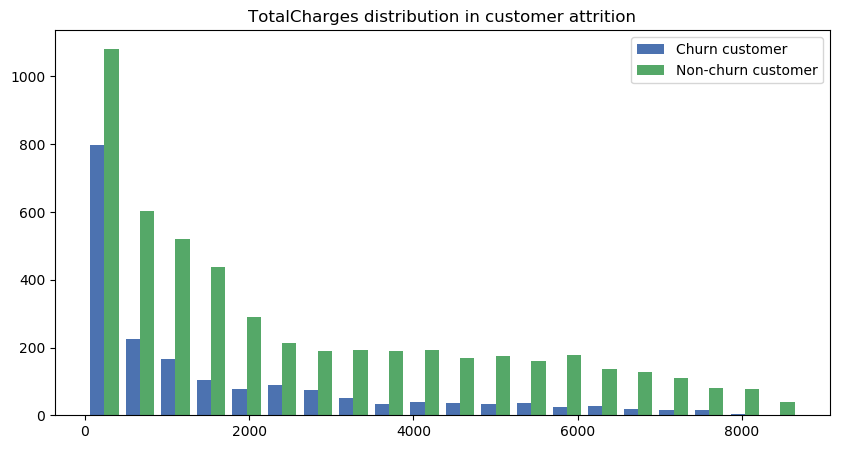

In [22]:
plt.style.use('seaborn-deep')

for col in num_cols:
    plt.figure(figsize=(10,5))
    plt.hist([churn[col], not_churn[col]], bins=20, label=['Churn customer', 'Non-churn customer'])
    plt.title(col +" distribution in customer attrition")
    plt.legend()
    plt.show()
    

### 3.2 Scatter plot with numerical columns

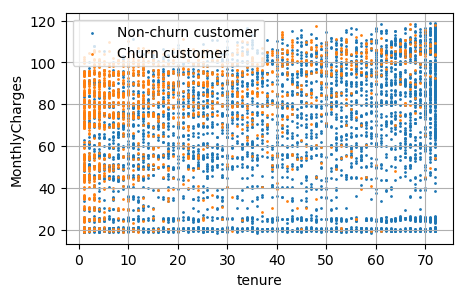

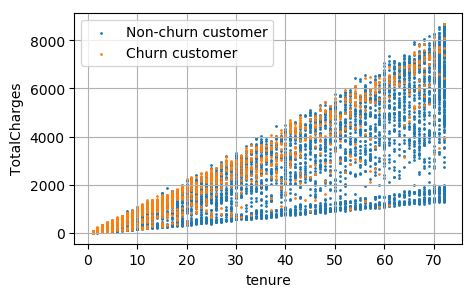

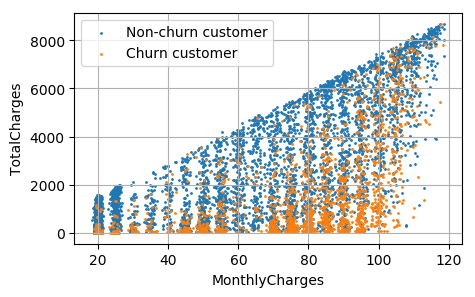

In [23]:
plt.style.use('default')
for i in range(len(num_cols)-1):
    for j in range(i+1, len(num_cols)):
        x_col, y_col = num_cols[i], num_cols[j]
        plt.figure(figsize=(5, 3))
        plt.scatter(x=not_churn[x_col], y=not_churn[y_col], s=1, label='Non-churn customer')
        plt.scatter(x=churn[x_col], y=churn[y_col], s=1, label='Churn customer')
        plt.grid(True)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.legend()
        plt.show()

In [24]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

### 3.3 Monthly Charges & Total Charges by Tenure group

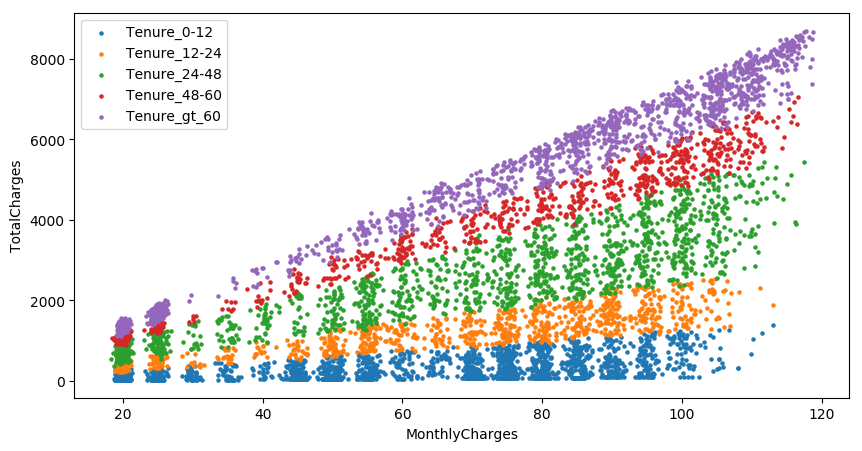

In [25]:
plt.style.use('default')

plt.figure(figsize=(10, 5))
x_label = 'MonthlyCharges'
y_label = 'TotalCharges'
for group, groupdf in telcom.groupby(by='tenure_group'):
    plt.scatter(x=groupdf[x_label], y=groupdf[y_label], s=5, label=group)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.show()

### 3.4 Average Charges by tenure groups¶

In [26]:
avg_tgc = telcom.groupby(["tenure_group","Churn"])\
             [["MonthlyCharges", "TotalCharges"]]\
             .mean().reset_index()\
             .set_index("tenure_group")

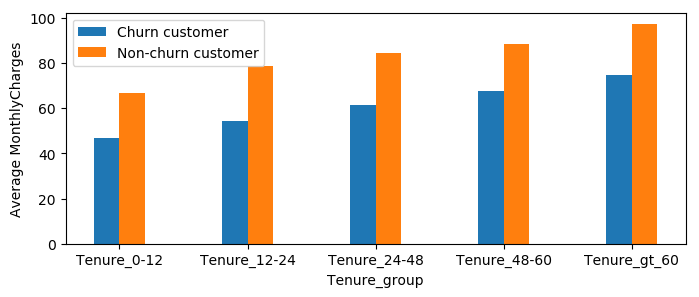

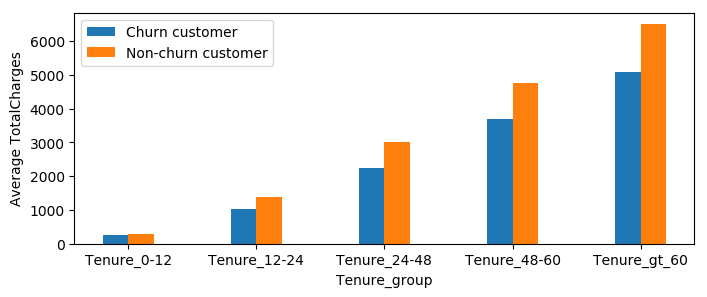

In [27]:
labels = sorted(list(set(avg_tgc.index.tolist())))

for col in ['MonthlyCharges', 'TotalCharges']:
    val_c = []
    val_n = []
    for lab in labels:
        val_c.append(avg_tgc[avg_tgc.Churn=='No'][col][lab])
        val_n.append(avg_tgc[avg_tgc.Churn=='Yes'][col][lab])

    plt.figure(figsize=(8,3))
    _lab = np.arange(len(labels))

    plt.bar(_lab - 0.1, val_c, 0.2, label='Churn customer')
    plt.bar(_lab + 0.1, val_n, 0.2, label='Non-churn customer')
    plt.xticks(_lab, labels) # set labels manually
    plt.xlabel('Tenure_group')
    plt.legend()
    plt.ylabel('Average ' + col)
    plt.show()

## 4. Data preprocessing

In [28]:
from sklearn.preprocessing import LabelEncoder    # one-hot encoding categorical
from sklearn.preprocessing import StandardScaler  # Scale numerical data

In [29]:
#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [30]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])

In [31]:
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols )

In [32]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [33]:
#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols, axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [34]:
# new version of telcom
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457


### 3.5 Variable summary

In [35]:
pd.DataFrame(telcom.describe())\
  .transpose().reset_index()\
  .rename(columns = {"index" : "feature"})\
  .set_index('feature')

,count,mean,std,min,25%,50%,75%,max
feature,,,,,,,,
gender,7032.0,0.504693,0.500014,0.000000,0.000000,1.000000,1.000000,1.000000
SeniorCitizen,7032.0,0.162400,0.368844,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7032.0,0.482509,0.499729,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7032.0,0.298493,0.457629,0.000000,0.000000,0.000000,1.000000,1.000000
PhoneService,7032.0,0.903299,0.295571,0.000000,1.000000,1.000000,1.000000,1.000000
OnlineSecurity,7032.0,0.286547,0.452180,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineBackup,7032.0,0.344852,0.475354,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,7032.0,0.343857,0.475028,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,7032.0,0.290102,0.453842,0.000000,0.000000,0.000000,1.000000,1.000000


### 3.6 Correlation Matrix¶

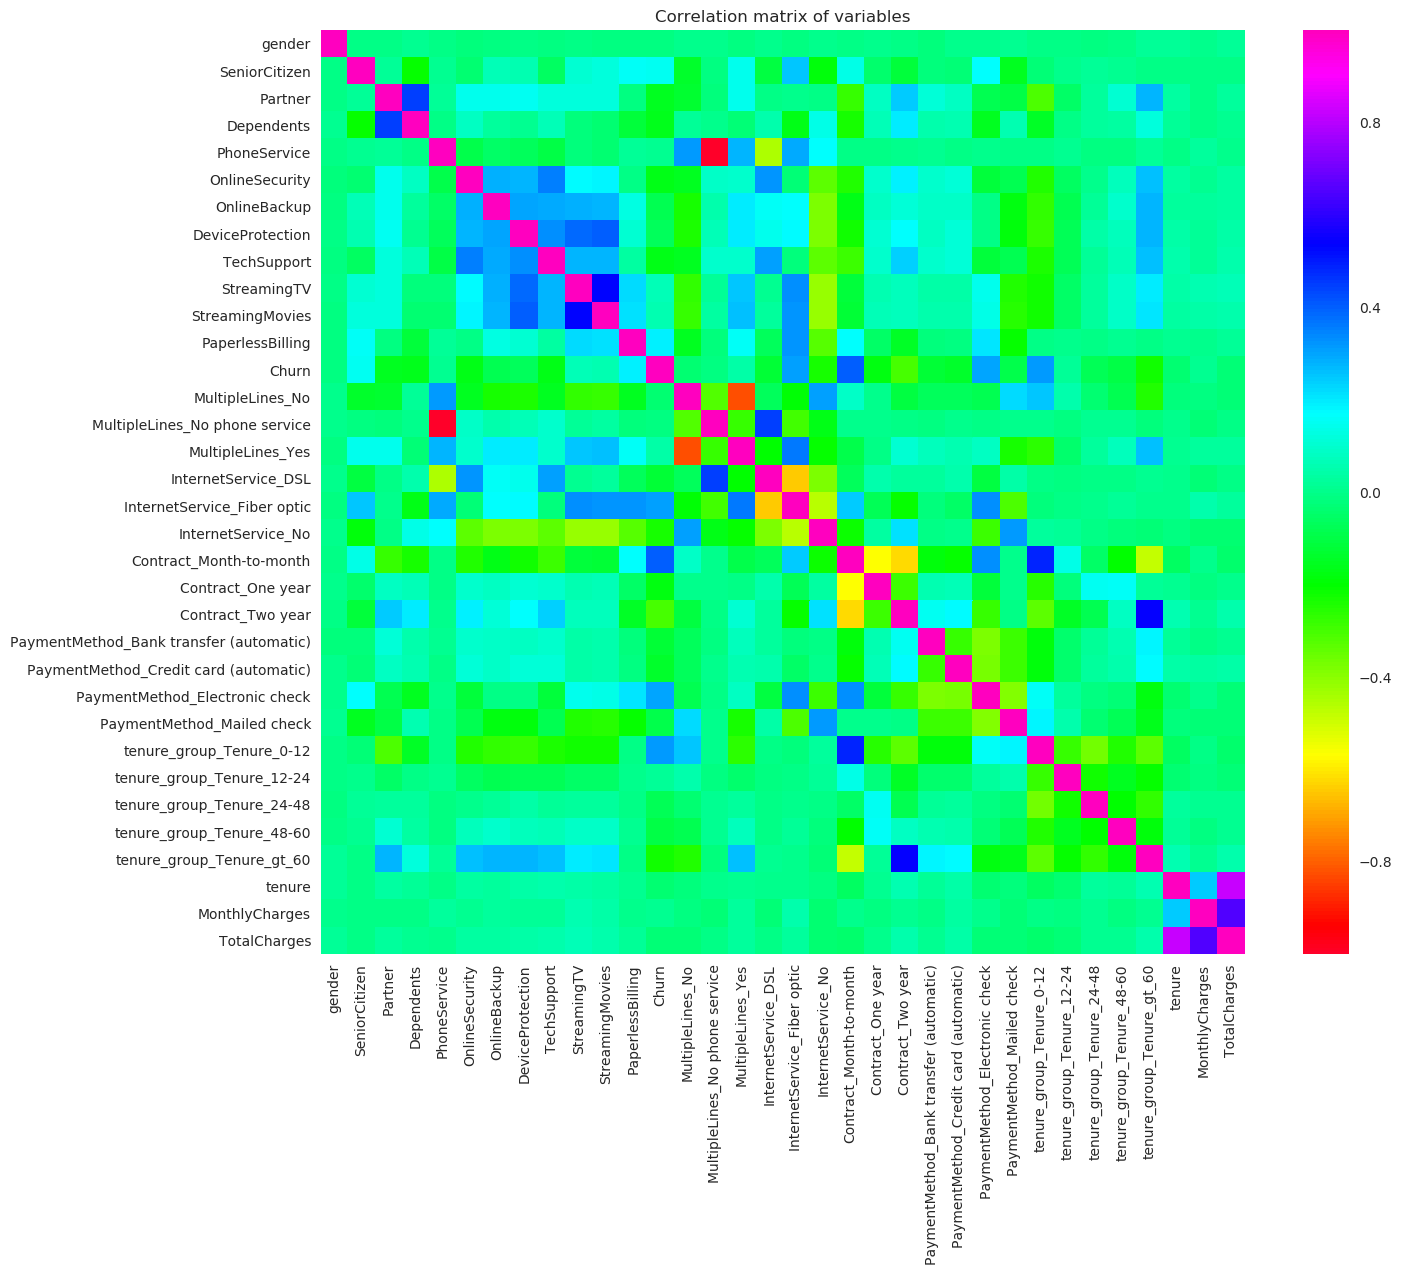

In [36]:
import seaborn as sns
sns.set(font_scale=1)
plt.figure(figsize=(15,12))
sns.heatmap(data=telcom.corr(), xticklabels=True, yticklabels=True, cmap='gist_rainbow', square=True)
plt.title('Correlation matrix of variables')
plt.show()

### 3.7 Visualising data with principal components

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)  # use 2 component to plot in 2D

# drop null value
telcom.dropna(inplace=True)

# feature to plot
X = telcom[[i for i in telcom.columns if i not in Id_col + target_col]]
Y = telcom[target_col + Id_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")

pca_data.set_index('customerID')
pca_data["Churn"] = pca_data["Churn"].replace({1.0: True, 0.0: False})

In [38]:
pca_data.head(5)

,PC1,PC2,Churn,customerID
0,-2.021260,-0.275811,False,7590-VHVEG
1,-0.241465,-0.448413,False,5575-GNVDE
2,-1.602674,-0.871667,True,3668-QPYBK
3,-0.174353,0.437028,False,7795-CFOCW
4,-1.343344,-1.107947,True,9237-HQITU


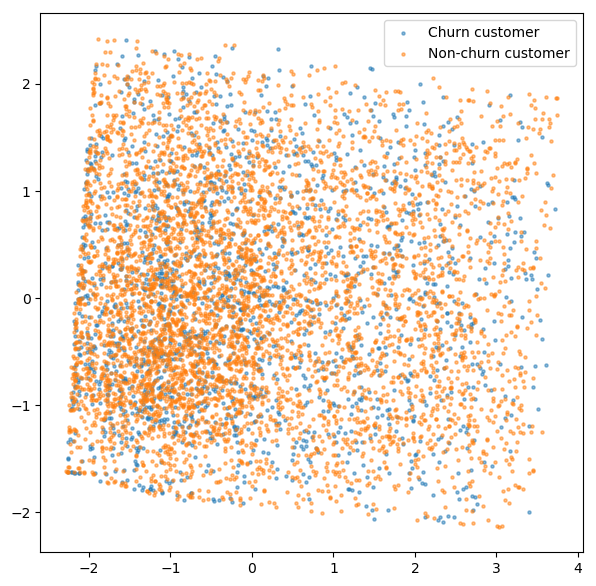

In [39]:
# plotting
pca_data.dropna(inplace=True)
churn_ = pca_data[pca_data.Churn]
not_c = pca_data[pca_data.Churn == False]

plt.style.use('default')
plt.figure(figsize=(7,7))
plt.scatter(churn_.PC1, churn_.PC2, label='Churn customer', s=5, alpha=0.5)
plt.scatter(not_c.PC1, not_c.PC2, label='Non-churn customer', s=5, alpha=0.5)
plt.legend()
plt.show()

## 5. Model Building

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score

/home/hung/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 5.1 Preparing data

In [41]:
#splitting train and test data 
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)
## seperating dependent and independent variables
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

### 5.2 Build & train model

In [42]:
# initialise model
clf = LogisticRegression(max_iter=200)
# train
clf.fit(X=train_X, y=train_Y)

/home/hung/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 5.3 Evaluate model

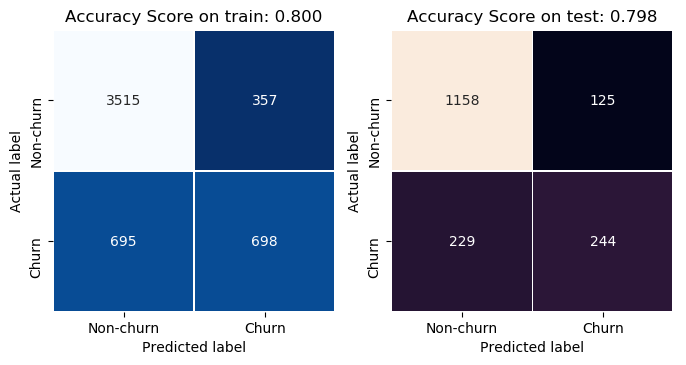

In [43]:
# get predictions 
Ytrain_pred = clf.predict(train_X)
Ytest_pred = clf.predict(test_X)
# calculate confusion matrices
cm_train = confusion_matrix(y_true=train_Y, y_pred=Ytrain_pred)
cm_test = confusion_matrix(y_true=test_Y, y_pred=Ytest_pred)
# accuracy score
train_acc = accuracy_score(y_true=train_Y, y_pred=Ytrain_pred)
test_acc = accuracy_score(y_true=test_Y, y_pred=Ytest_pred)
# visualization with seaborn
labels = ['Non-churn', 'Churn']
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt='.0f', linewidths=.5, 
            xticklabels=labels, yticklabels=labels,
            square = True, cmap = 'Blues_r', cbar=False
           );
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on train: %.3f'%(train_acc)
plt.title(all_sample_title, size = 12);

plt.subplot(1,2,2)
sns.heatmap(cm_test, annot=True, fmt='.0f', linewidths=.5, 
            xticklabels=labels, yticklabels=labels,
            square = True, cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on test: %.3f' % test_acc
plt.title(all_sample_title, size = 12);

In [44]:


print('='*50, '\nOn train set:\n')
print(classification_report(train_Y, Ytrain_pred))
print('='*50, '\nOn test set:\n')
print(classification_report(test_Y, Ytest_pred))

On train set:

             precision    recall  f1-score   support

          0       0.83      0.91      0.87      3872
          1       0.66      0.50      0.57      1393

avg / total       0.79      0.80      0.79      5265

On test set:

             precision    recall  f1-score   support

          0       0.83      0.90      0.87      1283
          1       0.66      0.52      0.58       473

avg / total       0.79      0.80      0.79      1756



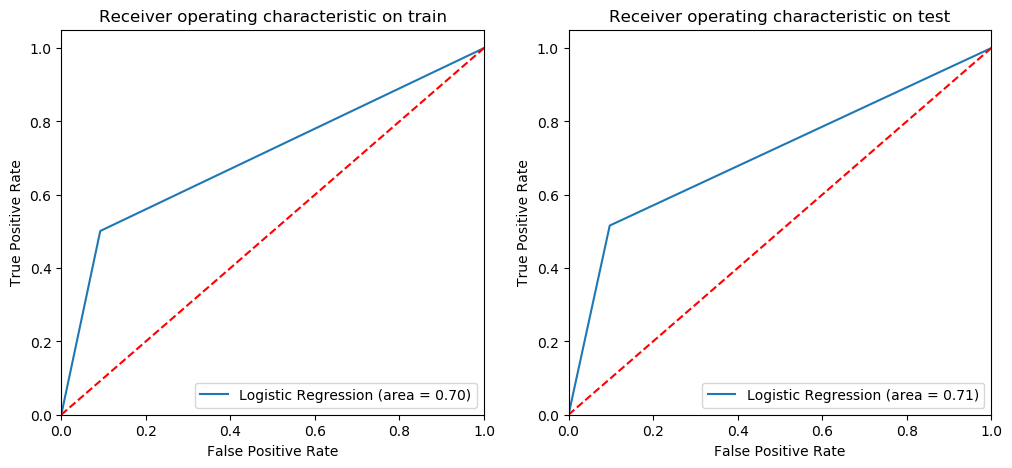

In [45]:
plt.figure(figsize=(12,5))

#train
plt.subplot(1,2,1)
logit_roc_auc = roc_auc_score(train_Y, Ytrain_pred)
fpr, tpr, thresholds = roc_curve(train_Y, Ytrain_pred)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on train')
plt.legend(loc="lower right")

#test
plt.subplot(1,2,2)
logit_roc_auc = roc_auc_score(test_Y, Ytest_pred)
fpr, tpr, thresholds = roc_curve(test_Y, Ytest_pred)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on test')
plt.legend(loc="lower right")

plt.show()